#### StatsModels 패키지 소개
- StatsModels는 기초 통계, 회귀분석, 시계열 분석 등 다양한 통계 분석 기능을 제공하는 파이썬 패키지이다.
    - 기초 통계 (Statistics)
        - 각종 검정 (test ) 기능
        - 커널 밀도 추정
        - Generalized Method of Moments
    - 회귀 분석 (Linear Regression)
        - 선형 모형 (Linear Model)
        - 일반화 선형 모형 (Generalized Linear Model)
        - 강인 선형 모형 (Robust Linear Model)
        - 선형 혼합 효과 모형 (Linear Mixed Effects Model)
        - ANOVA (Analysis of Variance)
        - Discrete Dependent Variable (Logistic Regression 포함)
    - 시계열 분석 (Time series Analysis)
        - ARMA/ARIMA Process
        - Vector ARMA Process

StatsModels 패키지를 사용할 때는 다음처럼 api 서브패키지를 임포트하여 사용한다.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
%matplotlib inline

#### StatsModels의 샘플 데이터

- StatsModels 패키지의 개발 목표 중 하나는 기존에 R을 사용하여 통계 분석 및 시계열 분석을 하던 사용자가 파이썬에서 동일한 분석을 할 수 있도록 하는 것이다. 따라서 R에서 제공하던 명령어 뿐만 아니라 Rdatasets 이라는 프로젝트를 통해 R에서 사용하던 1000개 이상의 표준 데이터 셋도 동일하게 제공하기 위해 노력하고 있다.

#### `get_rdataset` 함수

StatsModels의 datasets 서브패키지에 있는 `get_rdataset`함수를 사용하면 표준 데이터셋을 가져올 수 있다.

In [ ]:
get_rdataset(item, [package="datasets"])

 `item`과 `package` 인수로 해당 데이터의 "Package"이름과 "item"을 넣는다.
 "Package"이름이 datasets인 경우에는 생략할 수 있다.
 이 함수는 인터넷에서 데이터를 다운로드 받으므로 인터넷에 연결되어 있어야 한다.
 이렇게 받은 데이터는 다음과 같은 속성을 가지고 있다.
 - `data`: 데이터를 담고 있는 데이터 프레임
 - `__doc__`: 데이터에 대한 설명 문자열.

#### 샘플데이터의 예1: 타이타닉 생존자

In [4]:
data = sm.datasets.get_rdataset('Titanic', package="datasets")

In [5]:
df = data.data
df.tail()

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [6]:
print(data.__doc__)

+---------+-----------------+
| Titanic | R Documentation |
+---------+-----------------+

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

    Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

+----+----------+---------------------+
| No | Name     | Levels              |
+----+----------+---------------------+
| 1  | Class    | 1st, 2nd, 3rd, Crew |
+----+----------+---------------------+
| 2  | Sex      | Male, Female        |
+----+----------+---------------------+
| 3  | Age      | Child, Adult        |
+----+----------+---------------------+
| 4  | Survived | No, Yes             |
+----+----------+------------------

#### 샘플데이터의 예 2: 미국 강수량

In [9]:
data = sm.datasets.get_rdataset('precip')

In [10]:
print(data.__doc__)

+--------+-----------------+
| precip | R Documentation |
+--------+-----------------+

Annual Precipitation in US Cities
---------------------------------

Description
~~~~~~~~~~~

The average amount of precipitation (rainfall) in inches for each of 70
United States (and Puerto Rico) cities.

Usage
~~~~~

::

    precip

Format
~~~~~~

A named vector of length 70.

Note
~~~~

The dataset version up to Nov.16, 2016 had a typo in ``"Cincinnati"``'s
name. The examples show how to recreate that version.

Source
~~~~~~

Statistical Abstracts of the United States, 1975.

References
~~~~~~~~~~

McNeil, D. R. (1977) *Interactive Data Analysis*. New York: Wiley.

Examples
~~~~~~~~

::

    require(graphics)
    dotchart(precip[order(precip)], main = "precip data")
    title(sub = "Average annual precipitation (in.)")

    ## Old ("wrong") version of dataset (just name change):
    precip.O <- local({
       p <- precip; names(p)[names(p) == "Cincinnati"] <- "Cincinati" ; p })
    stopifnot(all

In [11]:
df = data.data
df.tail()

,dat
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


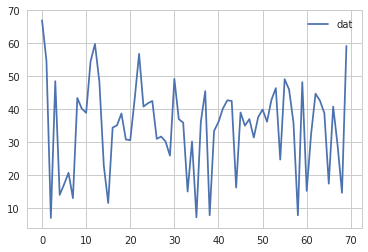

In [14]:
df.plot()
plt.show()

#### 샘플데이터의 예 3: 황체형성 호르몬 수치 시계열

In [16]:
data = sm.datasets.get_rdataset('lh')

In [17]:
print(data.__doc__)

+----+-----------------+
| lh | R Documentation |
+----+-----------------+

Luteinizing Hormone in Blood Samples
------------------------------------

Description
~~~~~~~~~~~

A regular time series giving the luteinizing hormone in blood samples at
10 mins intervals from a human female, 48 samples.

Usage
~~~~~

::

    lh

Source
~~~~~~

P.J. Diggle (1990) *Time Series: A Biostatistical Introduction.* Oxford,
table A.1, series 3



In [18]:
df = data.data
df.tail()

,time,value
43,44,2.6
44,45,2.1
45,46,3.4
46,47,3.0
47,48,2.9


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


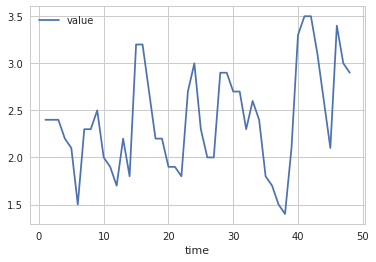

In [23]:
df.plot(x='time', y='value')
plt.show()

#### 샘플데이터의 예 4: 호흡기 질환 사망자 수 

In [24]:
data = sm.datasets.get_rdataset('deaths', 'MASS')

In [25]:
print(data.__doc__)

+--------+-----------------+
| deaths | R Documentation |
+--------+-----------------+

Monthly Deaths from Lung Diseases in the UK
-------------------------------------------

Description
~~~~~~~~~~~

A time series giving the monthly deaths from bronchitis, emphysema and
asthma in the UK, 1974-1979, both sexes (``deaths``),

Usage
~~~~~

::

    deaths

Source
~~~~~~

P. J. Diggle (1990) *Time Series: A Biostatistical Introduction.*
Oxford, table A.3

References
~~~~~~~~~~

Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics with
S.* Fourth edition. Springer.

See Also
~~~~~~~~

This the same as dataset ``ldeaths`` in **R**'s datasets package.



In [26]:
df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


이 시계열 데이터에서는 시간이 1년으로 1.0으로, 1개월을 1/12로 하는 값(year-fraction)으로 인코딩되어 잇다. 이 값을 파이썬으로 datetime 포맷으로 바꾸려면 다음과 같은 함수를 써야 한다.

In [28]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [29]:
df['datetime'] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


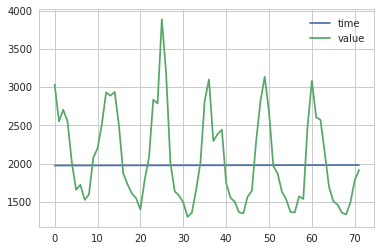

In [27]:
df.plot()
plt.show()

#### 샘플 데이터의 예 5: 항공 운송 인원

In [30]:
data = sm.datasets.get_rdataset('AirPassengers')
print(data.__doc__)

+---------------+-----------------+
| AirPassengers | R Documentation |
+---------------+-----------------+

Monthly Airline Passenger Numbers 1949-1960
-------------------------------------------

Description
~~~~~~~~~~~

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

Usage
~~~~~

::

    AirPassengers

Format
~~~~~~

A monthly time series, in thousands.

Source
~~~~~~

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time Series
Analysis, Forecasting and Control.* Third Edition. Holden-Day. Series G.

Examples
~~~~~~~~

::

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)

    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24)
    tl <- 

In [31]:
df = data.data
df.tail()

,time,value
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [32]:
df['datetime'] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
139,1960.583333,606,1960-08-01
140,1960.666667,508,1960-09-01
141,1960.750000,461,1960-10-01
142,1960.833333,390,1960-11-01
143,1960.916667,432,1960-12-01


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


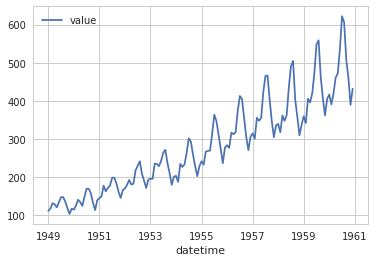

In [34]:
df.plot(x='datetime', y='value')
plt.show()